# EDA  | SIDDHARTH VERMA |PARIKSHIT MOURYA | HARISH YADAV

In [14]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Path to the 'defects' folder
defects_folder = r"PCBData\defects"

# Check the contents of the 'defects' folder
defects_contents = os.listdir(defects_folder)
print("Contents of 'defects' folder:")
print(defects_contents)

# Check the subfolders within the 'defects' folder
subfolders = [f for f in defects_contents if os.path.isdir(os.path.join(defects_folder, f))]
print("\nSubfolders within 'defects' folder:")
print(subfolders)


Contents of 'defects' folder:
['copper', 'mousebit', 'open', 'pin-hole', 'short', 'spur']

Subfolders within 'defects' folder:
['copper', 'mousebit', 'open', 'pin-hole', 'short', 'spur']


**step 2**

In [15]:
# Check the subfolders within the 'defects' folder
subfolders = [f for f in os.listdir(defects_folder) if os.path.isdir(os.path.join(defects_folder, f))]

# Iterate through each subfolder and count the number of images
for subfolder in subfolders:
    subfolder_path = os.path.join(defects_folder, subfolder)
    # Count the number of files with allowed image extensions (e.g., .jpg, .jpeg, .png, .bmp)
    num_images = sum(1 for f in os.listdir(subfolder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')))
    print(f"Number of images in '{subfolder}' folder: {num_images}")

Number of images in 'copper' folder: 1474
Number of images in 'mousebit' folder: 1965
Number of images in 'open' folder: 1942
Number of images in 'pin-hole' folder: 1501
Number of images in 'short' folder: 1506
Number of images in 'spur' folder: 1625


**step 3**

In [16]:
from PIL import Image

# Function to check properties of images
def check_image_properties(folder_path):
    image_properties = []
    # Loop through all files in the folder
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            # Open the image
            img = Image.open(img_path)
            # Get image properties
            width, height = img.size
            mode = img.mode
            image_properties.append({'filename': filename, 'width': width, 'height': height, 'mode': mode})
            # Close the image
            img.close()
    return image_properties

# Check image properties in each subfolder
subfolders = [f for f in os.listdir(defects_folder) if os.path.isdir(os.path.join(defects_folder, f))]
for subfolder in subfolders:
    subfolder_path = os.path.join(defects_folder, subfolder)
    print(f"Properties of images in '{subfolder}' folder:")
    image_properties = check_image_properties(subfolder_path)
    for prop in image_properties:
        print(prop)
    print()

Properties of images in 'copper' folder:
{'filename': 'defect_00041000_4.jpg', 'width': 31, 'height': 26, 'mode': 'RGB'}
{'filename': 'defect_00041000_9.jpg', 'width': 38, 'height': 28, 'mode': 'RGB'}
{'filename': 'defect_00041001_3.jpg', 'width': 33, 'height': 38, 'mode': 'RGB'}
{'filename': 'defect_00041002_5.jpg', 'width': 38, 'height': 34, 'mode': 'RGB'}
{'filename': 'defect_00041003_3.jpg', 'width': 34, 'height': 36, 'mode': 'RGB'}
{'filename': 'defect_00041004_3.jpg', 'width': 36, 'height': 42, 'mode': 'RGB'}
{'filename': 'defect_00041005_4.jpg', 'width': 45, 'height': 40, 'mode': 'RGB'}
{'filename': 'defect_00041005_5.jpg', 'width': 36, 'height': 43, 'mode': 'RGB'}
{'filename': 'defect_00041006_2.jpg', 'width': 41, 'height': 38, 'mode': 'RGB'}
{'filename': 'defect_00041006_4.jpg', 'width': 63, 'height': 38, 'mode': 'RGB'}
{'filename': 'defect_00041007_5.jpg', 'width': 31, 'height': 28, 'mode': 'RGB'}
{'filename': 'defect_00041007_6.jpg', 'width': 41, 'height': 43, 'mode': 'RGB'}

Sample images from 'copper' folder:


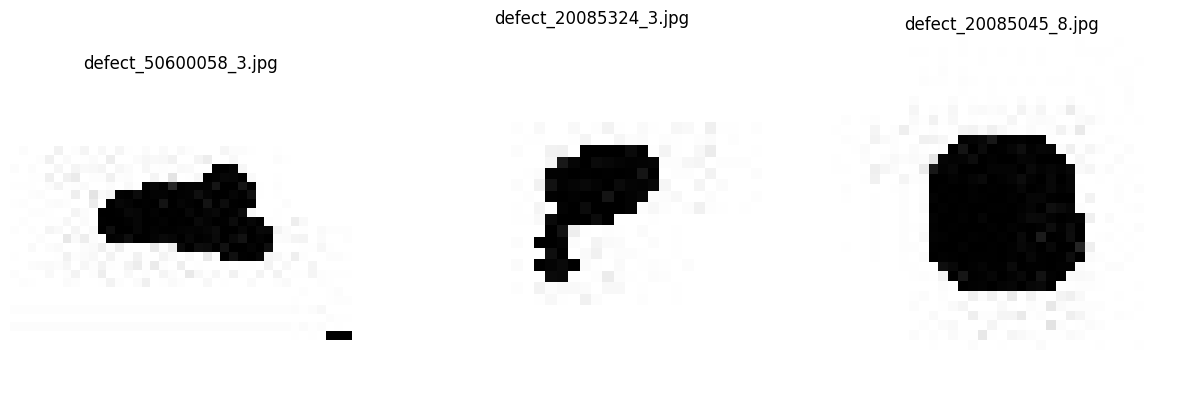

Sample images from 'mousebit' folder:


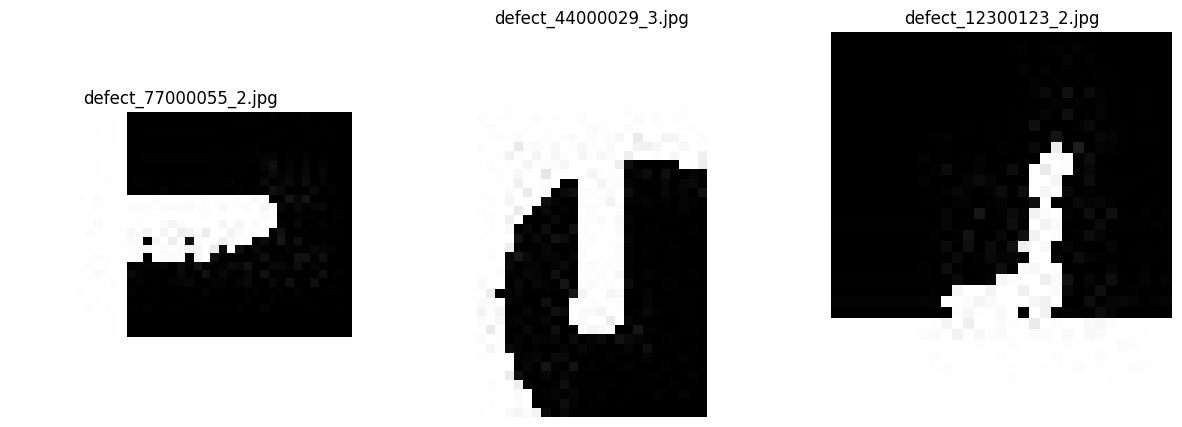

Sample images from 'open' folder:


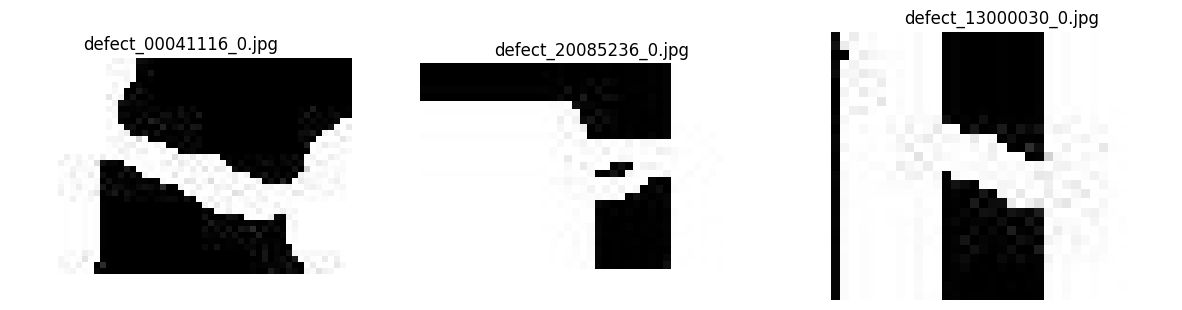

Sample images from 'pin-hole' folder:


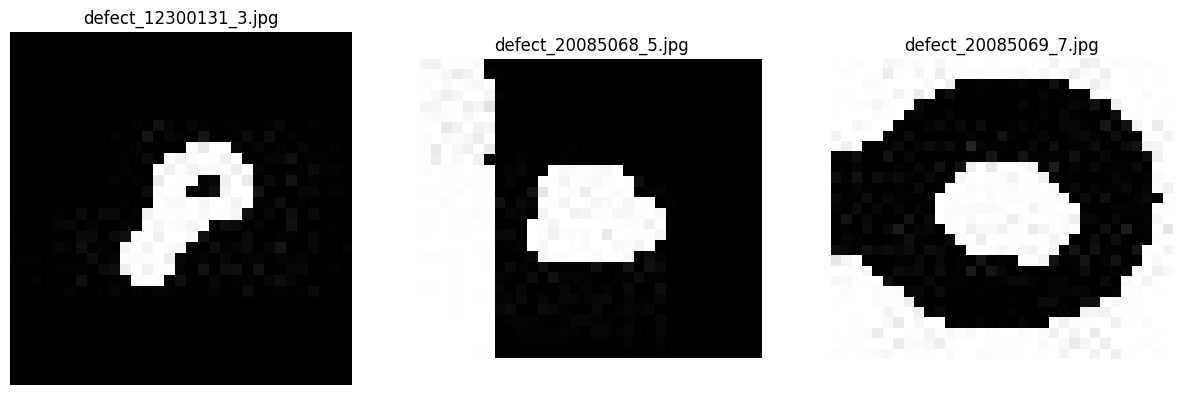

Sample images from 'short' folder:


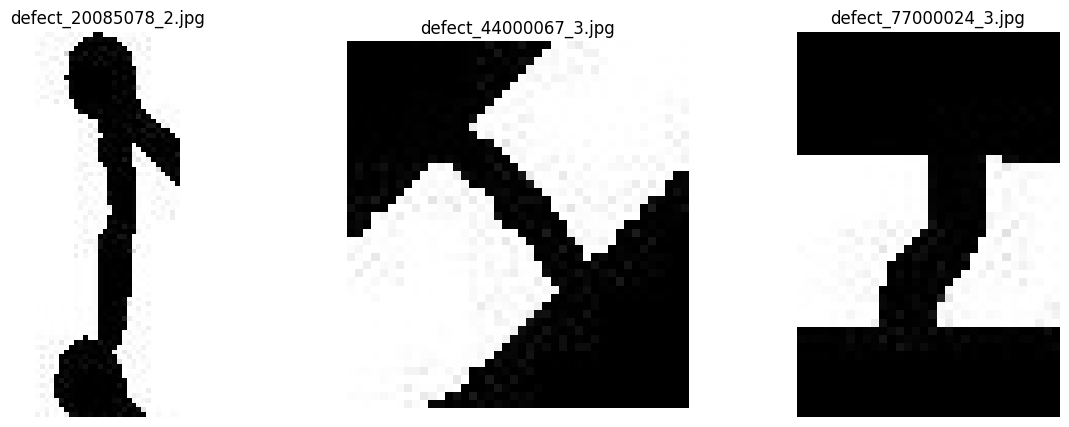

Sample images from 'spur' folder:


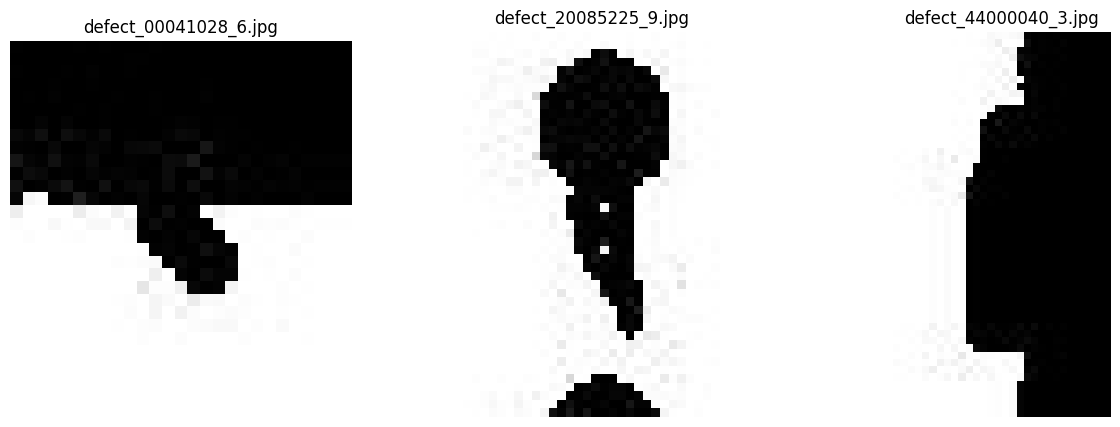

In [17]:
import matplotlib.pyplot as plt
import random

# Function to visualize sample images
def visualize_sample_images(folder_path, num_samples=3):
    # Get a list of image file paths
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
    # Randomly select num_samples images
    sample_files = random.sample(image_files, min(num_samples, len(image_files)))
    # Plot the sample images
    fig, axs = plt.subplots(1, num_samples, figsize=(15, 5))
    for i, file in enumerate(sample_files):
        img_path = os.path.join(folder_path, file)
        img = Image.open(img_path)
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(file)
    plt.show()

# Visualize sample images in each subfolder
subfolders = [f for f in os.listdir(defects_folder) if os.path.isdir(os.path.join(defects_folder, f))]
for subfolder in subfolders:
    subfolder_path = os.path.join(defects_folder, subfolder)
    print(f"Sample images from '{subfolder}' folder:")
    visualize_sample_images(subfolder_path)


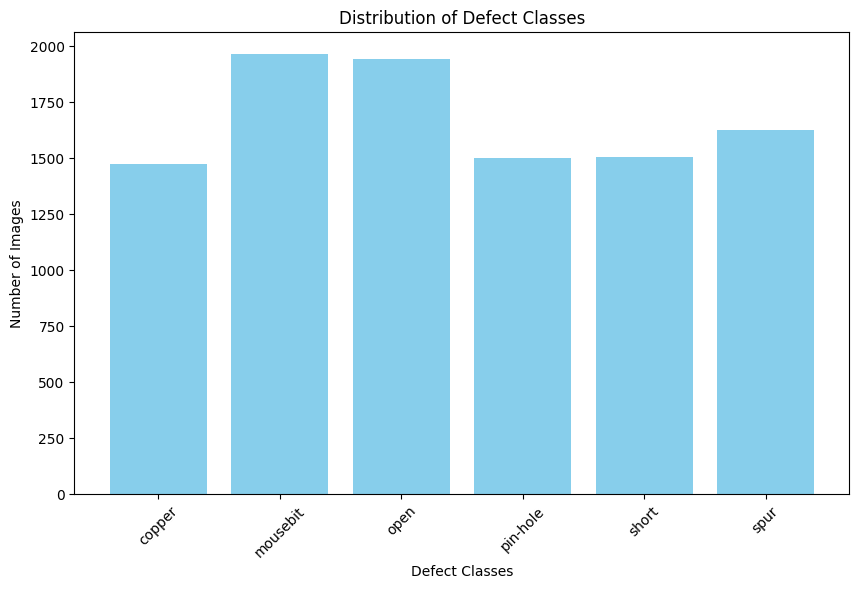

In [18]:
# Count the number of images in each subfolder
subfolders = [f for f in os.listdir(defects_folder) if os.path.isdir(os.path.join(defects_folder, f))]
num_images_per_class = {subfolder: len(os.listdir(os.path.join(defects_folder, subfolder))) for subfolder in subfolders}

# Plot the distribution of classes
plt.figure(figsize=(10, 6))
plt.bar(num_images_per_class.keys(), num_images_per_class.values(), color='skyblue')
plt.xlabel('Defect Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Defect Classes')
plt.xticks(rotation=45)
plt.show()

**pie chart**

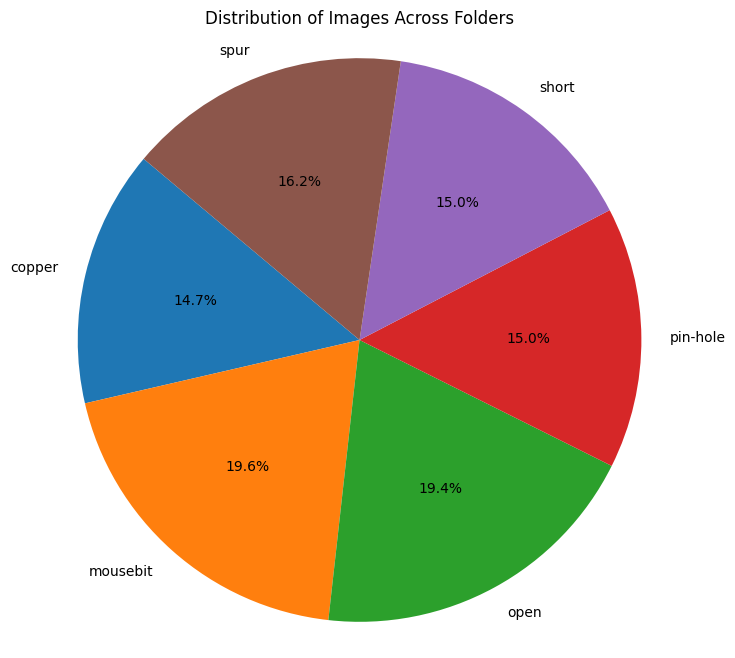

In [19]:
# Count the number of images in each subfolder
subfolders = [f for f in os.listdir(defects_folder) if os.path.isdir(os.path.join(defects_folder, f))]
num_images_per_folder = {subfolder: len(os.listdir(os.path.join(defects_folder, subfolder))) for subfolder in subfolders}

# Plot the distribution of images as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(num_images_per_folder.values(), labels=num_images_per_folder.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Images Across Folders')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Image Analysis**

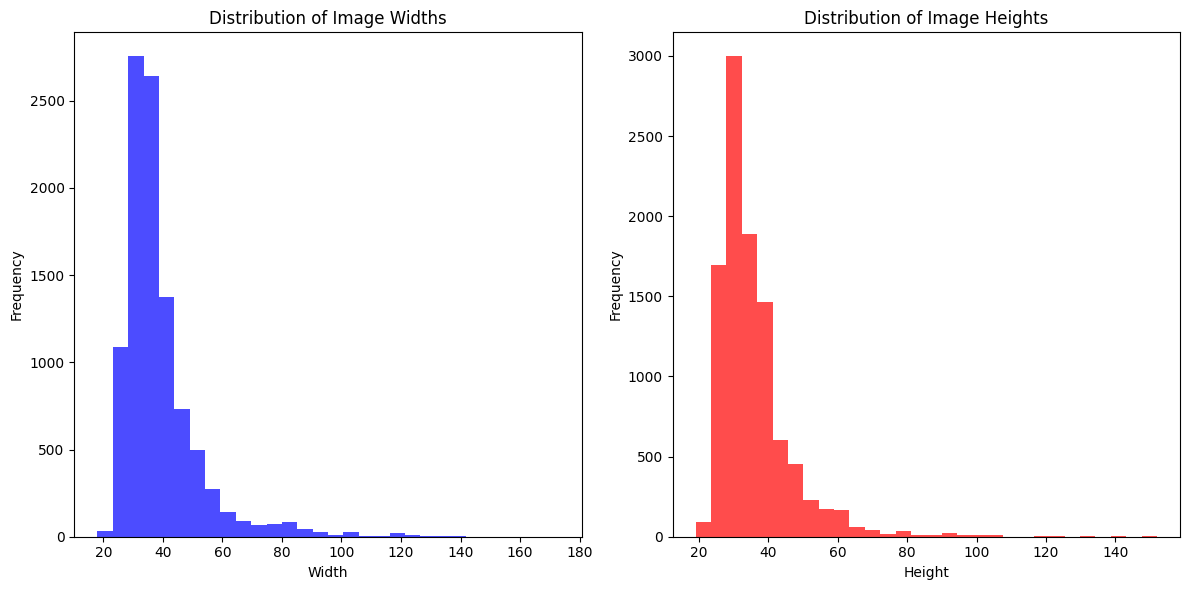

In [20]:
import pickle
import glob
import cv2

def analyze_images(folder_path):
    # Initialize lists to store image sizes
    widths = []
    heights = []

    # Iterate over subfolders in the main folder
    for subdir in os.listdir(folder_path):
        subfolder = os.path.join(folder_path, subdir)
        if os.path.isdir(subfolder):
            # Analyze images in each subfolder
            for file_name in os.listdir(subfolder):
                file_path = os.path.join(subfolder, file_name)
                if os.path.isfile(file_path):
                    # Read image and get its size
                    image = cv2.imread(file_path)
                    if image is not None:
                        height, width, _ = image.shape
                        widths.append(width)
                        heights.append(height)

    # Plot histograms of image sizes
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=30, color='b', alpha=0.7)
    plt.title('Distribution of Image Widths')
    plt.xlabel('Width')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=30, color='r', alpha=0.7)
    plt.title('Distribution of Image Heights')
    plt.xlabel('Height')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Sample and display images from each subfolder
    

# Specify the path to the main folder containing 6 subfolders with images
folder_path = "PCBData/defects"

# Perform EDA
analyze_images(folder_path)

In [24]:
def explore_images_folder(folder_path, save_path):
    # Initialize lists for image sizes
    widths = []
    heights = []

    # Create a subfolder for saving plots
    subfolder_name = os.path.basename(folder_path)
    subfolder_save_path = os.path.join(save_path, subfolder_name)
    os.makedirs(subfolder_save_path, exist_ok=True)

    # Collect image paths
    image_paths = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            image_paths.append(file_path)

    # Load and analyze images
    images = []
    for image_path in image_paths:
        image = cv2.imread(image_path)
        if image is not None:
            height, width, _ = image.shape
            widths.append(width)
            heights.append(height)
            # Resize image to a common size
            resized_image = cv2.resize(image, (224, 224))  # Adjust the size as needed
            images.append(resized_image)

    # Plot histograms of image sizes
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=30, color='b', alpha=0.7)
    plt.title('Distribution of Image Widths')
    plt.xlabel('Width')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=30, color='r', alpha=0.7)
    plt.title('Distribution of Image Heights')
    plt.xlabel('Height')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.savefig(os.path.join(subfolder_save_path, 'image_size_histogram.png'))  # Save histogram as PNG
    plt.close()

    # Display sample images
    num_samples = min(len(images), 5)
    sample_images = random.sample(images, num_samples)

    plt.figure(figsize=(12, 8))
    for i, image in enumerate(sample_images):
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(image_rgb)
        plt.title(f"Image {i+1}")
        plt.axis('off')

    plt.savefig(os.path.join(subfolder_save_path, 'sample_images.png'))  # Save sample images as PNG
    plt.close()

    # Color channels analysis
    for i, image in enumerate(sample_images):
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        r_channel = image_rgb[:, :, 0]
        g_channel = image_rgb[:, :, 1]
        b_channel = image_rgb[:, :, 2]

        # Plot histograms of color channels
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.hist(r_channel.ravel(), bins=256, color='r', alpha=0.7)
        plt.title('Red Channel Histogram')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

        plt.subplot(1, 3, 2)
        plt.hist(g_channel.ravel(), bins=256, color='g', alpha=0.7)
        plt.title('Green Channel Histogram')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

        plt.subplot(1, 3, 3)
        plt.hist(b_channel.ravel(), bins=256, color='b', alpha=0.7)
        plt.title('Blue Channel Histogram')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.savefig(os.path.join(subfolder_save_path, f'color_channel_histogram_{i}.png'))  # Save color channel histograms as PNG
        plt.close()

    # Correlation analysis
    correlations = []
    for i, image in enumerate(images):
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        r_channel = image_rgb[:, :, 0].flatten()
        g_channel = image_rgb[:, :, 1].flatten()
        b_channel = image_rgb[:, :, 2].flatten()

        # Calculate correlation coefficients
        r_g_corr = np.corrcoef(r_channel, g_channel)[0, 1]
        r_b_corr = np.corrcoef(r_channel, b_channel)[0, 1]
        g_b_corr = np.corrcoef(g_channel, b_channel)[0, 1]

        correlations.append((r_g_corr, r_b_corr, g_b_corr))

    # Plot correlation coefficients
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(correlations)), [c[0] for c in correlations], label='R-G Correlation', marker='o')
    plt.plot(range(len(correlations)), [c[1] for c in correlations], label='R-B Correlation', marker='o')
    plt.plot(range(len(correlations)), [c[2] for c in correlations], label='G-B Correlation', marker='o')
    plt.xlabel('Image Index')
    plt.ylabel('Correlation Coefficient')
    plt.title('Color Channel Correlation Analysis')
    plt.legend()
    plt.grid()
    plt.savefig(os.path.join(subfolder_save_path, 'color_channel_correlation.png'))  # Save color channel correlation plot as PNG
    plt.close()

# Specify the path to the main folder containing subfolders with images
folder_path = "PCBData/defects"

# Specify the path to the folder where plots will be saved
save_path = "DataAnalysis_Images"

# Create the save folder if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Perform exploratory data analysis for each subfolder
for subdir in os.listdir(folder_path):
    subfolder = os.path.join(folder_path, subdir)
    if os.path.isdir(subfolder):
        print(f"Exploratory Data Analysis for folder: {subdir}")
        explore_images_folder(subfolder, save_path)

Exploratory Data Analysis for folder: copper
Exploratory Data Analysis for folder: mousebit
Exploratory Data Analysis for folder: open
Exploratory Data Analysis for folder: pin-hole
Exploratory Data Analysis for folder: short
Exploratory Data Analysis for folder: spur


# WE HAVE SAVED ALL THE DATA ANALYSIS IMAGES IN A FOLDER WITH EACH SUBFOLDER HAVING DATA ANALYSIS IMAGES OF ITS